# Feature extraction implementation

The following cell loads the paths. Use the paths file that you have been using for the rest of the project.

In [1]:
import os
# Paths, Make sure the elastix folder etc. is included in your current working directory
paths = open(os.getcwd() + r"\\paths.txt").read().splitlines()
ELASTIX_PATH, TRANSFORMIX_PATH, DATA_PATH ,OUTPUT_DIR, PARAM_DIR = paths

for path in paths:
    print(path,'\n')

C:\Users\20202310\Desktop\Vakken jaar 1\Capita selecta in medical image analysis\myfolder\elastix.exe 

C:\Users\20202310\Desktop\Vakken jaar 1\Capita selecta in medical image analysis\myfolder\transformix.exe 

C:\Users\20202310\Desktop\Vakken jaar 1\Capita selecta in medical image analysis\DevelopmentData 

C:\Users\20202310\PycharmProjects\8DM20_Capita_Selecta\results 

C:\Users\20202310\PycharmProjects\8DM20_Capita_Selecta\ParameterFiles 



## Initializing and running the class

The following cell creates a class instance for feature extraction.

In [2]:
from extractfeatures import extractfeatures

#Create class instance
obj = extractfeatures(DATA_PATH)

The following cell runs the functions necessary for feature extraction. (If this cell randomly prints a dictionary, don't mind it idk why it does this.)

In [3]:
obj.calculate_heterogeneity()
obj.calculate_svr()
obj.calculate_volume()

{'p135': np.float64(39653.45939887951),
 'p115': np.float64(40253.5577478774),
 'p117': np.float64(46300.55593048901),
 'p107': np.float64(46883.48817653582),
 'p127': np.float64(49998.420607865744),
 'p102': np.float64(51601.54388901863),
 'p133': np.float64(57838.79971267129),
 'p125': np.float64(58133.72289809456),
 'p109': np.float64(77803.69269905752),
 'p119': np.float64(79605.65667272698),
 'p120': np.float64(79758.9595088039),
 'p128': np.float64(106687.5682590083),
 'p116': np.float64(125817.9979074952),
 'p108': np.float64(135523.521781554),
 'p129': np.float64(162162.92938065215)}

## Data visualisation

The following cell generates 3 2d plots of all extracted features against each other.

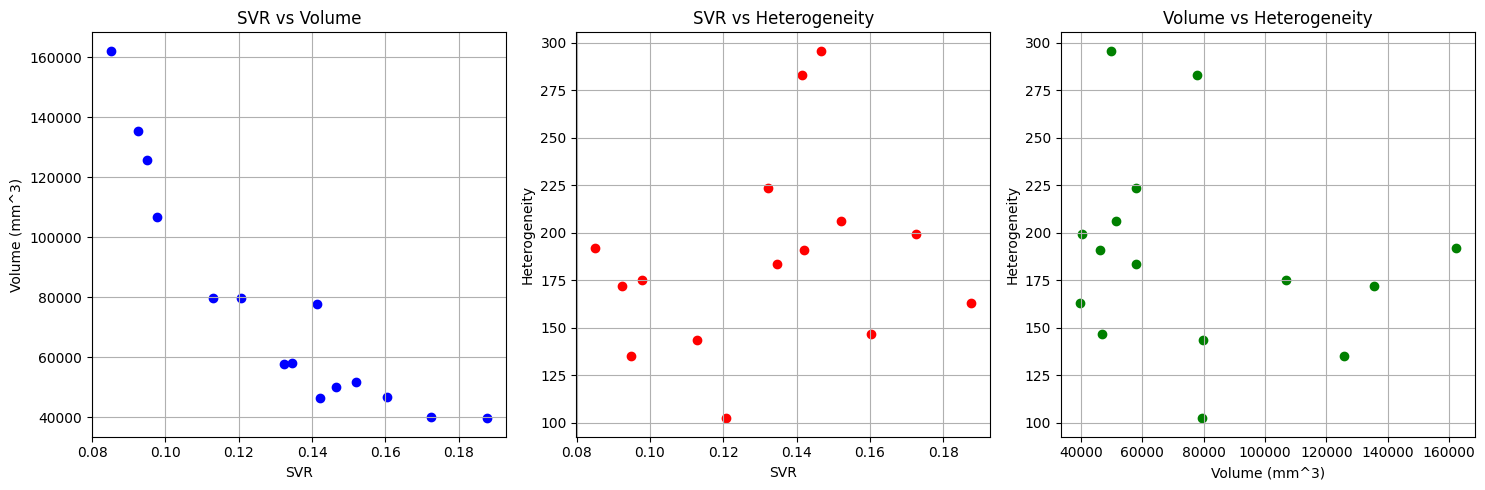

In [4]:
obj.generate_2d_plots()

The following cell generates a 3d plot of all extracted features, do with it what you want haha.

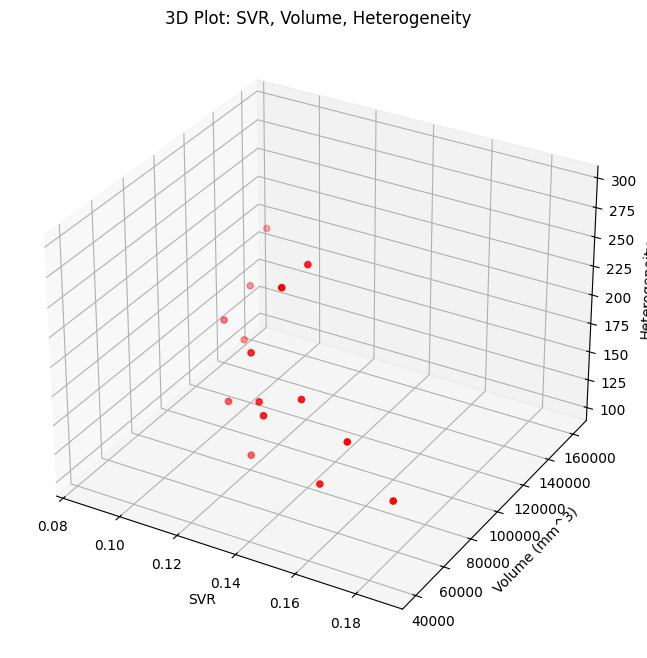

In [5]:
obj.generate_3d_plot()

## Percentile based division

The following cell divides all features based on percentile. 'Low' is represented by the lowest 25% of values of the selected features. 'Middle' is represented by the points between the lowest 25% and highest 75% of values of the selected features. 'High' is represented by the highest 75% of values of the selected features.

In [6]:
percentile_groups = obj.create_percentile_groups(lowerlimit=25, upperlimit=75)

The following cell prints the results and writes them to an output file

In [8]:
with open('percentile_groups_output.txt', 'w') as file:
    for category, groups in percentile_groups.items():
        print(f"\n{category} Percentile Groups:")
        file.write(f"\n{category} Percentile Groups:\n")
        for group, patients in groups.items():
            print(f"\n  {group.capitalize()} Percentile:")
            file.write(f"\n  {group.capitalize()} Percentile:\n")
            for patient_id, value in patients.items():
                print(f"    Patient {patient_id}: {value:.5f}")
                file.write(f"    Patient {patient_id}: {value:.5f}\n")

print("Output written to 'percentile_groups_output.txt' and printed to the console.")


SVR Percentile Groups:

  Low Percentile:
    Patient p129: 0.08512
    Patient p108: 0.09240
    Patient p116: 0.09493
    Patient p128: 0.09774

  Middle Percentile:
    Patient p120: 0.11288
    Patient p119: 0.12067
    Patient p133: 0.13226
    Patient p125: 0.13463
    Patient p109: 0.14147
    Patient p117: 0.14208
    Patient p127: 0.14663

  High Percentile:
    Patient p102: 0.15208
    Patient p107: 0.16040
    Patient p115: 0.17254
    Patient p135: 0.18771

Volume Percentile Groups:

  Low Percentile:
    Patient p117: 46300.55593
    Patient p107: 46883.48818
    Patient p115: 40253.55775
    Patient p135: 39653.45940

  Middle Percentile:
    Patient p120: 79758.95951
    Patient p119: 79605.65667
    Patient p133: 57838.79971
    Patient p125: 58133.72290
    Patient p109: 77803.69270
    Patient p127: 49998.42061
    Patient p102: 51601.54389

  High Percentile:
    Patient p129: 162162.92938
    Patient p108: 135523.52178
    Patient p116: 125817.99791
    Patient p1